# Clustering - Ouray County Parcel Risk
**Author:** Bryce A Young  
**Created:** 2025-01-17 | 
**Modified:** 2025-03-05  

#### Overview
In this notebook, I do two things: 
1. I use unsupervized learning models to cluster home types **without** risk score as a variable. I then draw comparisons between clusters and average risk scores. 
2. I use PCA and t-SNE to reduce the dimensionality of the dataset to derive home archetypes and test the reduced dataset with supervized risk prediction methods.

*NOTE: Clustering effectively groups homes into archetypes, then we can go back and assign archetypes to homes and assess how many of those homes burned in historic fires such as Palisades, Eaton, Lahaina, Marshall, and Camp.*

## Environment Setup
---

In [4]:
# setup environment
import os
### Directory ###
# Repository
os.chdir(r'D:/_PROJECTS/P001_OurayParcel/ouray')
# Root workspace
ws = r'D:/_PROJECTS/P001_OurayParcel'

### Data paths ###
# Folder where all the data inputs and outputs will live
data = os.path.join(ws, 'data')
# Scratch folder for intermediate files
scratch = os.path.join(data, '_temp')
# Any final outputs go here
out = os.path.join(data, '_out')
# Figures to export
figs = os.path.join(out, 'figures')

# correct working directory
os.getcwd()

'D:\\_PROJECTS\\P001_OurayParcel\\ouray'

## Reducing Dimensionality - PCA
---
Here we use Principal Components Analysis (PCA) to reduce the dimensionality of the dataset.

In [13]:
import pandas as pd
df = pd.read_csv(os.path.join(scratch, 'MAIN_20250303.csv'))
pd.set_option('display.max_columns', None)
df.head()

,rwra_index,feat_index,parcel_num,Year,address,ParcelNum,Model,Address_Visible,Driveway_Clearance,Driveway_Lenth,Dist_to_Danger_Topo,Slope_Final,Background_Fuels,Defensible_Space,Roofing_Material,Building_Exterior,Other_Combustibles,Decks_and_Fencing,Proximity_to_Neighboring_Home,Ingress_Egress,Score_Final,Risk_Rating,County,wui_class,min_ssd,mean_cc0_2m,mean_cc2_4m,mean_cc4_8m,mean_cc8_40m,intersections,PARCELNB,ACCOUNT,ACRES_calc,hiz_ext_out,tax_AIRC,tax_ARCH,tax_SQFT,tax_COND,tax_EYB,tax_EXW_PERCENT,tax_EXW,tax_FLR,tax_FRME,tax_HTFL,tax_INT,tax_RMS,tax_RCVR,tax_RSTR,Type,sum_cc,tax_WBL,tax_DGR,tax_PTO,tax_OPP,Risk_Rating_new,At_Least_8_Unobserved
0,0,2836,430506210001,2013.0,123 EXAMPLE DRIVE,430506210001,A,0,5,NaN,0,NaN,75,75,0,0,10,50,NaN,10,225.0,High,Ouray County,1,31.525324,0.028983,0.080487,0.112609,0.179108,1,430506210001,R003918,49.6527,True,1 - NONE,COMMERCIAL,6991.1,3 - GOOD,2015.0,10.0,CONC/MSNRY,CONC/MSNRY,WOOD,PROPANE,DRYWALL,0.776148,METAL,GABLE,Commercial,0.401187,NaN,NaN,NaN,Large,Moderate,False
1,1,1110,430506210001,2013.0,129 EXAMPLE DRIVE,430506210001,A,0,5,NaN,0,NaN,50,50,0,20,10,0,NaN,0,135.0,Low,Ouray County,1,31.525324,0.051442,0.096132,0.093393,0.155315,1,430506210001,R003918,49.6527,False,1 - NONE,COMMERCIAL,6991.1,3 - GOOD,2015.0,10.0,CONC/MSNRY,CONC/MSNRY,WOOD,PROPANE,DRYWALL,0.776148,METAL,GABLE,Commercial,0.396283,NaN,NaN,NaN,Large,Low,False
2,2,3672,430506210001,2013.0,135 EXAMPLE DRIVE,430506210001,A,0,5,NaN,75,NaN,50,100,0,60,10,50,NaN,10,360.0,Extreme,Ouray County,1,66.164004,0.035089,0.059277,0.031211,0.026098,0,430506210001,R003918,49.6527,True,1 - NONE,COMMERCIAL,6991.1,3 - GOOD,2015.0,10.0,CONC/MSNRY,CONC/MSNRY,WOOD,PROPANE,DRYWALL,0.776148,METAL,GABLE,Commercial,0.151675,NaN,NaN,NaN,Large,Moderate,False
3,3,3843,430506210001,2013.0,141 EXAMPLE DRIVE,430506210001,A,0,0,NaN,0,NaN,50,75,200,60,30,0,NaN,0,415.0,Extreme,Ouray County,1,78.033957,0.054498,0.065344,0.076959,0.213781,0,430506210001,R003918,49.6527,False,1 - NONE,COMMERCIAL,6991.1,3 - GOOD,2015.0,10.0,CONC/MSNRY,CONC/MSNRY,WOOD,PROPANE,DRYWALL,0.776148,METAL,GABLE,Commercial,0.410582,NaN,NaN,NaN,Large,High,False
4,5,921,403935100181,2017.0,416 COUNTY ROAD 22A,403935100181,B,5,0,11.0,0,0.0,10,50,0,0,0,0,0.0,0,76.0,Low,Ouray County,1,211.505051,0.048738,0.084885,0.034318,0.000000,0,403935100181,R000531,32.7283,False,1 - NONE,SINGLE STORY,4034.9,3 - GOOD,2015.0,100.0,CONC/MSNRY,WDJST,WOOD,GAS,DRYWALL,0.776148,ASPHALT,GABLE,Residence,0.167940,NaN,NaN,Large,Large,Low,False


In [14]:
# There are NaN values that we want to change to string values that say 'None'
cols2fix = ['tax_OPP', 'tax_DGR', 'tax_WBL', 'tax_PTO']
df[cols2fix] = df[cols2fix].fillna('None')

# Let's drop the 4 rows where Model == 'A'
df = df[df['Model'] != 'A']
print(df.shape)
df.head()

(1396, 56)


,rwra_index,feat_index,parcel_num,Year,address,ParcelNum,Model,Address_Visible,Driveway_Clearance,Driveway_Lenth,Dist_to_Danger_Topo,Slope_Final,Background_Fuels,Defensible_Space,Roofing_Material,Building_Exterior,Other_Combustibles,Decks_and_Fencing,Proximity_to_Neighboring_Home,Ingress_Egress,Score_Final,Risk_Rating,County,wui_class,min_ssd,mean_cc0_2m,mean_cc2_4m,mean_cc4_8m,mean_cc8_40m,intersections,PARCELNB,ACCOUNT,ACRES_calc,hiz_ext_out,tax_AIRC,tax_ARCH,tax_SQFT,tax_COND,tax_EYB,tax_EXW_PERCENT,tax_EXW,tax_FLR,tax_FRME,tax_HTFL,tax_INT,tax_RMS,tax_RCVR,tax_RSTR,Type,sum_cc,tax_WBL,tax_DGR,tax_PTO,tax_OPP,Risk_Rating_new,At_Least_8_Unobserved
4,5,921,403935100181,2017.0,416 COUNTY ROAD 22A,403935100181,B,5,0,11.0,0,0.0,10,50,0,0,0,0,0.0,0,76.0,Low,Ouray County,1,211.505051,0.048738,0.084885,0.034318,0.00000,0,403935100181,R000531,32.728300,False,1 - NONE,SINGLE STORY,4034.9,3 - GOOD,2015.0,100.0,CONC/MSNRY,WDJST,WOOD,GAS,DRYWALL,0.776148,ASPHALT,GABLE,Residence,0.167940,None,None,Large,Large,Low,False
5,6,509,403926423002,2017.0,3100 COUNTY ROAD 22,403926423002,B,15,0,11.0,0,0.0,10,0,0,0,80,0,0.0,0,116.0,Low,Ouray County,3,180.054332,0.023967,0.015273,0.000271,0.00004,0,403926423002,R005599,9.707660,False,1 - NONE,MULTI STORY,1942.0,2 - VERY GOOD,2010.0,100.0,CONC/MSNRY,WDJST,WOOD,GAS,DRYWALL,0.776148,METAL,GABLE,Residence,0.039551,Small,None,None,Small,Low,False
6,7,1296,403926300151,2017.0,3245 COUNTY ROAD 22,403926300151,B,0,0,11.0,0,0.0,20,50,0,0,0,0,100.0,0,181.0,Low,Ouray County,1,5.979973,0.032157,0.101354,0.136954,0.00000,1,403926300151,R004277,0.822618,True,1 - NONE,COMMERCIAL,1579.0,4 - AVERAGE,2000.0,100.0,METAL,CONC/MSNRY,WOOD,STOVE,DRYWALL,0.000000,METAL,MANSARD,Commercial,0.270465,None,None,None,None,Low,False
7,8,727,403936300089,2017.0,4452 COUNTY ROAD 1,403936300089,B,5,5,11.0,0,0.0,10,0,0,70,0,100,50.0,0,251.0,Moderate,Ouray County,3,20.479874,0.025695,0.047097,0.039426,0.00012,1,403936300089,R004198,38.439600,False,1 - NONE,MULTI STORY,2865.0,3 - GOOD,2000.0,100.0,WOOD,WDJST,WOOD,STOVE,DRYWALL,0.000000,METAL,GABLE,Residence,0.112337,None,None,None,None,Moderate,False
8,9,1332,403935200086,2017.0,3479 COUNTY ROAD 22,403935200086,B,5,5,11.0,0,0.0,10,0,0,70,80,0,0.0,0,181.0,Low,Ouray County,5,100.486083,0.018661,0.045186,0.068360,0.00000,0,403935200086,R004237,12.296800,True,1 - NONE,MULTI STORY,1696.0,3 - GOOD,2000.0,100.0,WOOD,WDJST,WOOD,ELECTRIC,DRYWALL,0.000000,ASPHALT,GABLE,Residence,0.132208,None,None,None,Small,Low,False


In [15]:
df.columns

Index(['rwra_index', 'feat_index', 'parcel_num', 'Year', 'address',
       'ParcelNum', 'Model', 'Address_Visible', 'Driveway_Clearance',
       'Driveway_Lenth', 'Dist_to_Danger_Topo', 'Slope_Final',
       'Background_Fuels', 'Defensible_Space', 'Roofing_Material',
       'Building_Exterior', 'Other_Combustibles', 'Decks_and_Fencing',
       'Proximity_to_Neighboring_Home', 'Ingress_Egress', 'Score_Final',
       'Risk_Rating', 'County', 'wui_class', 'min_ssd', 'mean_cc0_2m',
       'mean_cc2_4m', 'mean_cc4_8m', 'mean_cc8_40m', 'intersections',
       'PARCELNB', 'ACCOUNT', 'ACRES_calc', 'hiz_ext_out', 'tax_AIRC',
       'tax_ARCH', 'tax_SQFT', 'tax_COND', 'tax_EYB', 'tax_EXW_PERCENT',
       'tax_EXW', 'tax_FLR', 'tax_FRME', 'tax_HTFL', 'tax_INT', 'tax_RMS',
       'tax_RCVR', 'tax_RSTR', 'Type', 'sum_cc', 'tax_WBL', 'tax_DGR',
       'tax_PTO', 'tax_OPP', 'Risk_Rating_new', 'At_Least_8_Unobserved'],
      dtype='object')

In [16]:
pred_cols = [
    'wui_class', 'min_ssd', 'mean_cc0_2m',
       'mean_cc2_4m', 'mean_cc4_8m', 'mean_cc8_40m', 'intersections',
       'ACRES_calc', 'hiz_ext_out',
       'tax_ARCH', 'tax_SQFT', 'tax_EYB', 'tax_EXW_PERCENT',
       'tax_EXW', 'tax_HTFL', 'tax_RMS',
       'tax_RCVR', 'tax_RSTR', 'Type', 'sum_cc', 'tax_WBL', 'tax_DGR',
       'tax_PTO', 'tax_OPP'
]

In [159]:
num_cols = [
    'min_ssd',
    'mean_cc0_2m',
    'mean_cc2_4m',
    'mean_cc4_8m',
    'mean_cc8_40m',
    'sum_cc',
    'intersections',
    'ACRES_calc',
    'tax_SQFT',
    'tax_EYB',
    'tax_EXW_PERCENT',
    'tax_RMS'
]

cat_cols = [
    'wui_class',
    'hiz_ext_out',
    'tax_ARCH',
    'tax_EXW',
    'tax_HTFL',
    'tax_RCVR',
    'tax_RSTR',
    'Type',
    'tax_DGR',
    'tax_PTO',
    'tax_WBL',
    'tax_OPP'
]

#### Check explained variance
PCA transforms features into principal components (PCs) ranked by how much variance they explain. Normally in data that can be reduced with PCA, the first two or three PCs will explain 90% of the variance. We can see in the plot below that the 90% threshhold is not reached until 9 PCs (out of 12 total variables).

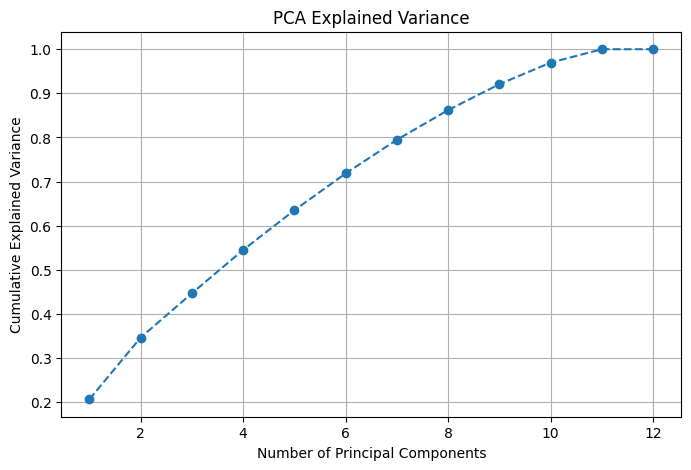

In [75]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Standardize data first
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[num_cols])

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(num_cols) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid()
plt.show()

#### Examine principal component loadings 
Each principal component is a linear combination of original features. Examining these can reveal which features influence each PC the most.

Below, I assess the loadings of each feature in each principal component (see printed dataframe). I evaluate PC2 and PC9. PC2 is normally where effective PCA explains >95% of variance, but in this case it only explains about 35% of variance. PC9 explains >90% of variance. That's why I chose to look into these PCs specifically.

**Analysis of PC2 (index 1 in table below)**  
We can see that min_ssd and intersections are strongly opposite in PC2 (index 1). Intersections is very similar to mean_cc8_40m, which were observed in a previous notebook (`hiz_analysis.ipynb`) to be correlated. Furthermore, the loading of min_ssd is very similar to tax_EYB. These two features were observed to be correlated - newer homes are built on more acres and have more distance between homes. This principal component therefore likely represents density vs. spacing. PC2, however, only accounts for about 35% of variance, according to the elbow chart above. So we can infer that structure density and spacing account for approximately 1/3 of the variance of structure features in Ouray County. The canopy features do not rise to the top of feature importance in PC2. This is possibly related to the lack of separation of structures and vegetation in the LiDAR rasters - mean_cc4_8m likely includes measurements of adjacent structures where intersections are greater than 0. Future improvements of this method should include object segmentation with LiDAR, possibly using point clouds and possibly using zentropy values in rasterized point clouds. This will improve confidence in distinguishing between structures and vegetation/artificial fuels such as cars and lawn furniture, improving the unique addition of these fuel cover features to the dataset.

**Analysis of PC9 (index 8 in table below)**  
PC9 explains >90% of the variance, although it does not significantly reduce dimensionality. In this component, hiz features have a weaker presence and structure features have a stronger presence in terms of absolute loading value. tax_EYB (effective year built) has the strongest loading at 0.69. ACRES_calc also has a positive loading at 0.41. These two features were observed to be correlated - newer homes exist on larger properties. Interestingly, tax_RMS (rooms) and tax_SQFT have inverse loading values (0.35 and -0.35, respectively). This would suggest that PC9 distinguishes size of the home vs. number of rooms in the home, possibly representing multi--family housing such as apartments, which are present in this dataset. PC9 is more difficult to evaluate compared  to PC2, but possibly represents multi-family vs. single-family homes as the strongest feature. 

In [51]:
import pandas as pd

# Get component loadings
loadings = pd.DataFrame(pca.components_, columns=num_cols)

# Show first few principal components
loadings

,min_ssd,mean_cc0_2m,mean_cc2_4m,mean_cc4_8m,mean_cc8_40m,sum_cc,intersections,ACRES_calc,tax_SQFT,tax_EYB,tax_EXW_PERCENT,tax_RMS
0,4.453405e-02,0.253555,0.524416,0.495007,-0.016024,0.572378,-1.388278e-01,-1.359575e-01,3.239080e-02,1.817777e-01,-1.120351e-01,3.752236e-02
1,-4.161103e-01,0.014388,0.008746,0.086290,0.425190,0.275686,4.606347e-01,1.209028e-01,-1.648157e-01,-4.417134e-01,2.356262e-01,2.402851e-01
2,8.955941e-02,-0.251524,-0.275971,0.045888,0.578744,0.141021,-2.290459e-01,9.042531e-02,4.667489e-01,1.553104e-01,-3.249189e-01,2.956864e-01
3,4.676050e-01,0.448087,-0.046773,-0.270360,0.202751,0.040499,-3.433172e-01,-6.969714e-02,-3.079230e-01,-1.845496e-01,2.208229e-01,4.027038e-01
4,3.265814e-01,0.167334,0.056281,0.027548,0.038957,0.103695,5.989238e-02,7.920597e-01,2.341222e-01,-9.110523e-02,1.861118e-01,-3.470597e-01
5,-2.100018e-01,0.617416,0.065282,-0.406638,0.025731,-0.039535,3.131517e-01,4.935152e-02,1.540938e-01,1.717312e-01,-4.983469e-01,2.776014e-02
6,-1.138974e-01,0.081993,0.123042,0.014321,-0.409939,-0.127595,6.058985e-03,1.685744e-02,6.150409e-01,-1.138336e-01,3.289173e-01,5.299896e-01
7,-1.546187e-01,0.234585,-0.137753,-0.128119,0.298981,0.080114,-2.844260e-02,-3.378529e-01,2.734043e-01,3.446889e-01,5.823497e-01,-3.771200e-01
8,-2.398799e-01,-0.087520,0.039101,-0.039054,-0.013939,-0.036892,-2.971306e-02,4.112767e-01,-3.489923e-01,6.896139e-01,2.030595e-01,3.486559e-01
9,5.891500e-01,-0.107716,-0.051675,0.094337,0.006671,0.009624,7.034415e-01,-1.965422e-01,1.871077e-02,2.609131e-01,6.100640e-02,1.548751e-01


In [76]:
# Get the fraction of variance explained by the first 2 principal components
fraction_variance_explained = pca.explained_variance_ratio_

# Print the result
print("Fraction of Variance Explained by first 2 Principal Components:")
print(f"Principal Component 1: {fraction_variance_explained[0]:.4f}")
print(f"Principal Component 2: {fraction_variance_explained[1]:.4f}")
print(f"Total Cumulative Variance Unexplained: {(1-(fraction_variance_explained[0] + fraction_variance_explained[1])): .4f}")

Fraction of Variance Explained by first 2 Principal Components:
Principal Component 1: 0.2066
Principal Component 2: 0.1399
Total Cumulative Variance Unexplained:  0.6535


#### Scatterplot the first two PCs
If the dataset has structure, clusters might emerge in the first two principal components.

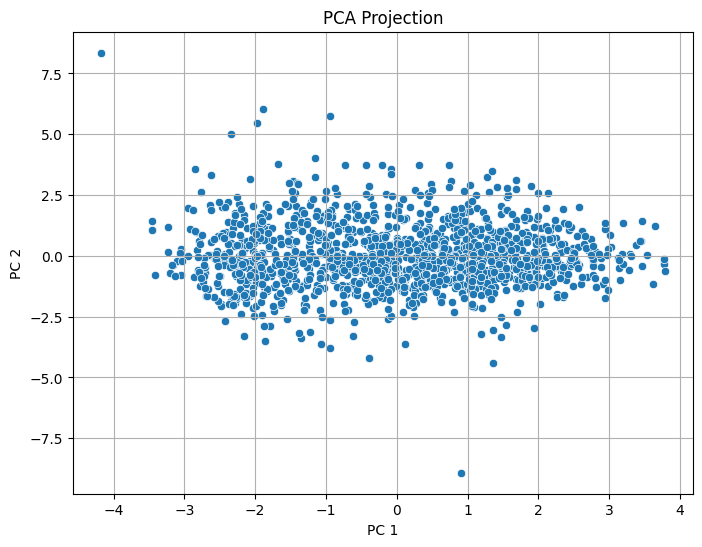

In [30]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('PCA Projection')
plt.grid()
plt.show()

#### Check correlation between PCs
Each PC should be uncorrelated with others. If two PCs are highly correlated, it means redundancy still exists.

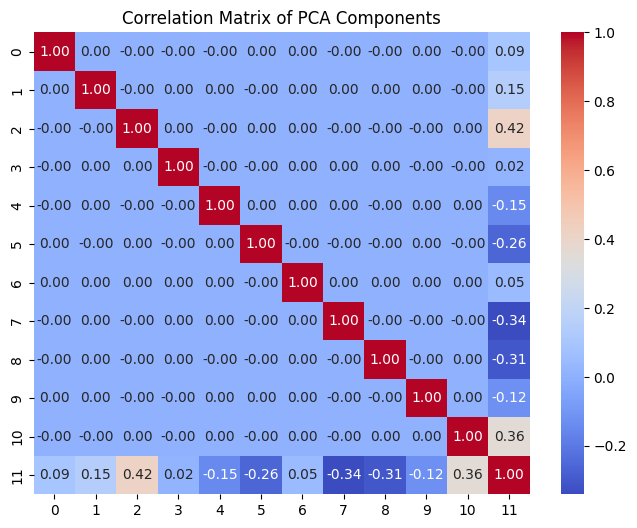

In [31]:
import numpy as np

corr_matrix = np.corrcoef(X_pca.T)
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of PCA Components")
plt.show()

#### Re-examining data
Let's look at the correlation of the numeric columns now to see if there is highly-correlated data. That will hamper PCA's ability to reduce dimensionality. We can see from the plot below that 'sum_cc' is correlated with each of the canopy height classes. Furthermore, intersections is correlated with min_ssd and tax_EYB. 

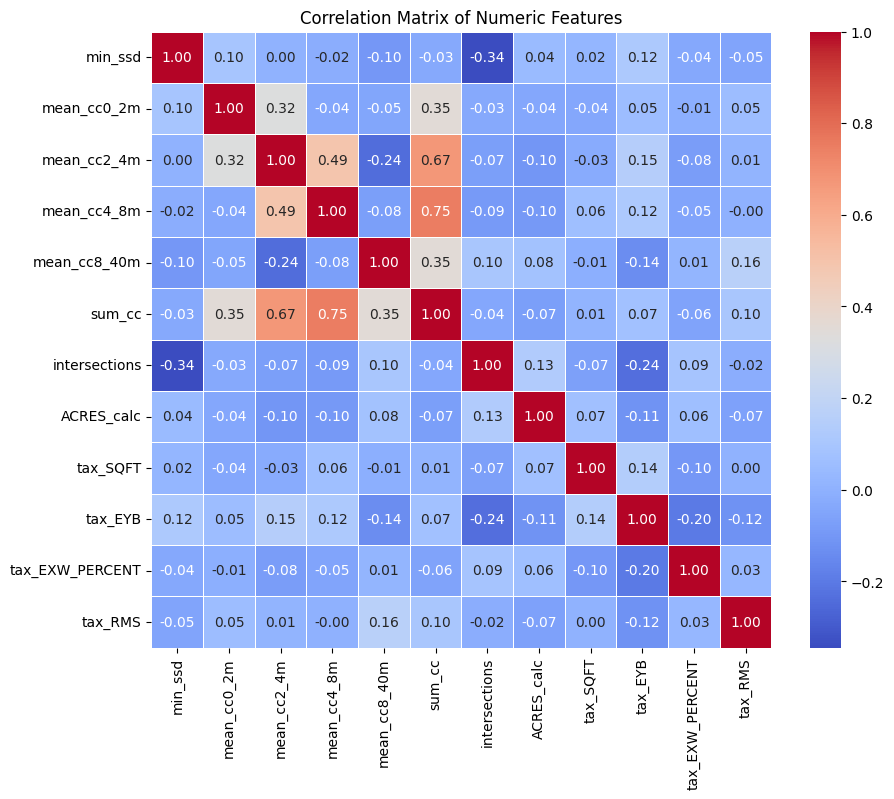

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df[num_cols].corr()

# Display correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of Numeric Features")
plt.show()

After removing and adding certain variables and trying PCA with different combinations of variables, there are not components that can easily reduce dimensionality while explaining 90%+ of variance. We will try reducing dimensionality with t-SNE below.

In the above analysis of PC2 and PC9, we can see that some principal components are comprised with higher representation of hiz features, and some with structure features. It is reasonable to assume that separating hiz and structure features and reducing dimensionality with each feature set separately may improve results and make the results more interpretable. Below, that's what I do.

### HIZ Features Isolated

In [69]:
# hiz cols include SSD, property size and fuel cover
hiz_cols = [
    'min_ssd',
    'mean_cc0_2m',
    'mean_cc2_4m',
    'mean_cc4_8m',
    'mean_cc8_40m',
    'sum_cc',
    'ACRES_calc'
]

# structure cols include structure features and structure density
str_cols = [
    'intersections',
    'tax_SQFT',
    'tax_EYB',
    'tax_EXW_PERCENT',
    'tax_RMS'
]

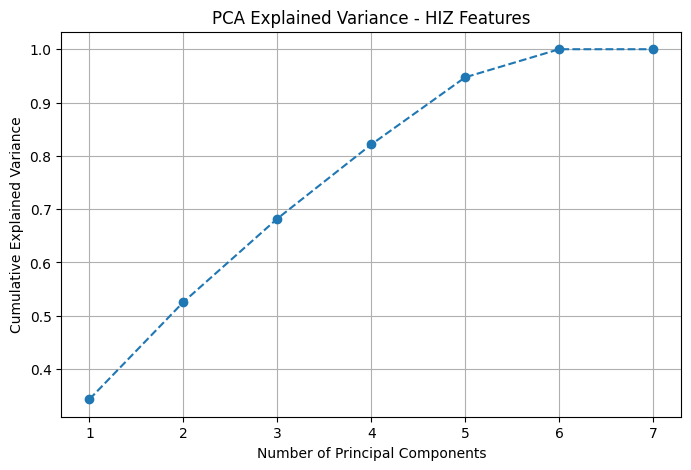

In [72]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Standardize data first
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[hiz_cols])

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(hiz_cols) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance - HIZ Features')
plt.grid()
plt.show()

In [60]:
import pandas as pd

# Get component loadings
loadings = pd.DataFrame(pca.components_, columns=hiz_cols)

# Show first few principal components
loadings

,min_ssd,mean_cc0_2m,mean_cc2_4m,mean_cc4_8m,mean_cc8_40m,sum_cc,ACRES_calc
0,-6.690563e-03,0.261784,0.536634,0.511668,0.017833,0.606837,-1.143449e-01
1,-3.842074e-01,-0.256777,-0.248595,0.078733,0.779421,0.273034,1.908079e-01
2,4.886125e-01,0.591580,-0.030047,-0.309189,0.305563,0.114478,4.564167e-01
3,3.590743e-01,-0.514099,0.035253,0.373573,-0.182945,0.008859,6.575870e-01
4,6.919701e-01,-0.247805,-0.208793,0.132504,0.289640,0.074151,-5.560834e-01
5,7.642585e-02,-0.391022,0.714154,-0.537545,0.203398,-0.019171,-2.349451e-02
6,6.370282e-17,-0.192261,-0.307358,-0.436268,-0.374280,0.733588,1.670309e-17


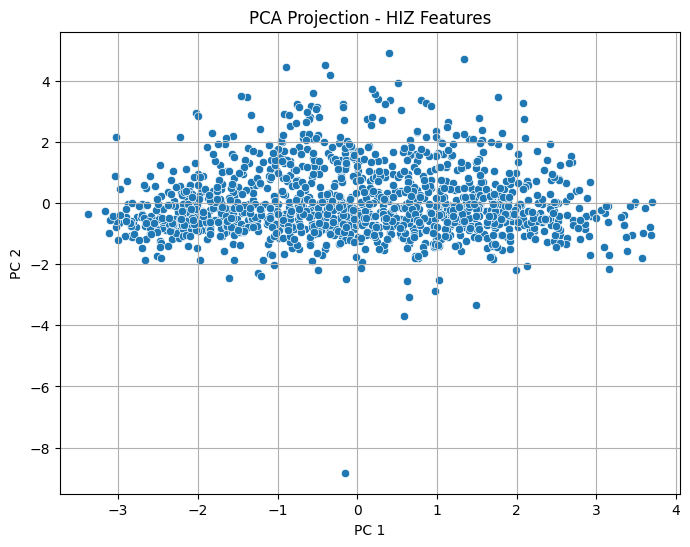

In [61]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('PCA Projection - HIZ Features')
plt.grid()
plt.show()

From the table above the plot, we can see that the first two PCs explain >50% of variance. From the plot above, we can see that no clusters emerge from the first two principal components. 

Below, we look at PC4 and PC5. PC5 explains >90% of variance (cumulatively with other PCs). However, there is very weak clustering evident in the plot. 

In my analysis of HIZ features, it is evident that there are certain types of homes. There are homes on large properties with no structures nearby but with vegetation (of varying height) in the HIZ. And there are homes that are in denser, more urban neighborhoods. Therefore, it is surprising that HIZ features do not effectively reduce in dimensionality. As I commented above, this is possibly due to the fact that the LiDAR fuel cover features do not distinguish between structures and vegetation. Separating these two features would presumably improve dimensionality reduction with principal components.

In [74]:
# Get the fraction of variance explained by the first 2 principal components
fraction_variance_explained = pca.explained_variance_ratio_

# Print the result
print("Fraction of Variance Explained by first 2 Principal Components:")
print(f"Principal Component 1: {fraction_variance_explained[0]:.4f}")
print(f"Principal Component 2: {fraction_variance_explained[1]:.4f}")
print(f"Total Cumulative Variance Unexplained: {(1-(fraction_variance_explained[0] + fraction_variance_explained[1])): .4f}")

Fraction of Variance Explained by first 2 Principal Components:
Principal Component 1: 0.3435
Principal Component 2: 0.1823
Total Cumulative Variance Unexplained:  0.4742


In [73]:
# Get the fraction of variance explained by the first 2 principal components
fraction_variance_explained = pca.explained_variance_ratio_

# Print the result
print("Fraction of Variance Explained by Principal Components 4 and 5:")
print(f"Principal Component 4: {fraction_variance_explained[3]:.4f}")
print(f"Principal Component 5: {fraction_variance_explained[4]:.4f}")
print(f"Total Cumulative Variance Unexplained: {(1-(fraction_variance_explained[3] + fraction_variance_explained[4])): .4f}")

Fraction of Variance Explained by Principal Components 4 and 5:
Principal Component 4: 0.1391
Principal Component 5: 0.1260
Total Cumulative Variance Unexplained:  0.7349


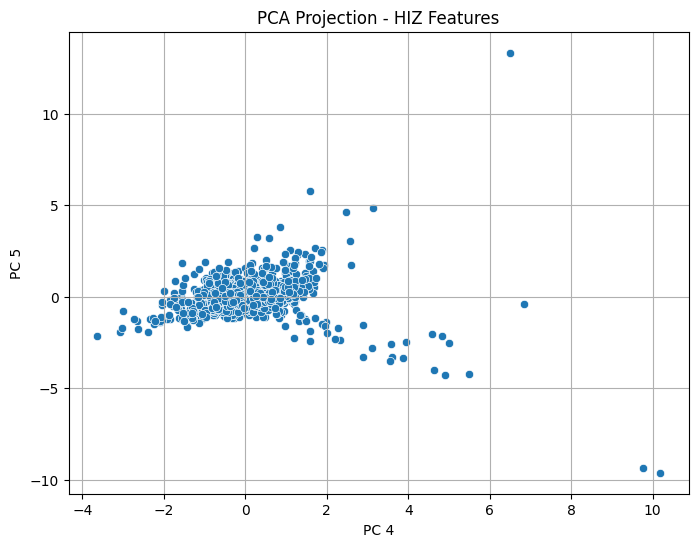

In [64]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,3], y=X_pca[:,4])
plt.xlabel('PC 4')
plt.ylabel('PC 5')
plt.title('PCA Projection - HIZ Features')
plt.grid()
plt.show()

### Tax Features Isolated

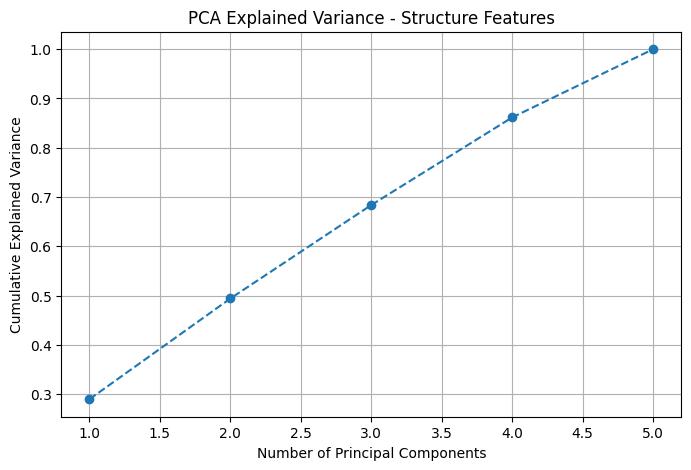

In [70]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Standardize data first
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[str_cols])

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(str_cols) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance - Structure Features')
plt.grid()
plt.show()

In [71]:
# Get the fraction of variance explained by the first 2 principal components
fraction_variance_explained = pca.explained_variance_ratio_

# Print the result
print("Fraction of Variance Explained by the First 2 Principal Components:")
print(f"Principal Component 1: {fraction_variance_explained[0]:.4f}")
print(f"Principal Component 2: {fraction_variance_explained[1]:.4f}")
print(f"Total Cumulative Variance Unexplained: {(1-(fraction_variance_explained[0] + fraction_variance_explained[1])): .4f}")

Fraction of Variance Explained by the First 2 Principal Components:
Principal Component 1: 0.2897
Principal Component 2: 0.2044
Total Cumulative Variance Unexplained:  0.5059


Again, it is surprising that dimensionality is not effectively reduced with tax features being isolated from hiz features. The features include 'intersections','tax_SQFT','tax_EYB','tax_EXW_PERCENT','tax_RMS'. In a map, we can observe that there are clusters of homes with high intersections values, and clusters of homes with no other homes around. We can observe in our analysis of features that there are large homes and small homes. There are old homes and new homes. Therefore, we would expect that dimensionality could be reduced in these features, but that is not the case, as the first two PCs only explain ~50% of variance, according to the plot above. In future iterations of this workflow, we could create two different columns for intersections: one in the HIZ at ~30m and one at ~100m to see if that impacts the ability to segment homes, because there are several 'compounds' that can be seen on the map in which a home might have 3 structures in its immediate surroundings and then not another structure for hundreds of meters, or over a mile.

In PCA, we are limited to numeric variables as opposed to categorical variables. The categorical variables, however, were more effective in predicting risk scores, as evaluated in `risk_pred.ipynb`.

## Reducing Dimensionality - t-SNE 
---
Here we use t-distributed stochastic neighbor embedding (t-SNE) to reduce dimensionality. We evaluate the performance and compare to PCA.

In [78]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

# Select numeric features
X = df[num_cols].copy()

# Standardize numeric data (mean=0, variance=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [146]:
cat_cols

['wui_class',
 'hix_ext_out',
 'tax_ARCH',
 'tax_EXW',
 'tax_HTFL',
 'tax_RCVR',
 'tax_RSTR',
 'Type',
 'tax_DGR',
 'tax_PTO',
 'tax_WBL',
 'tax_OPP']

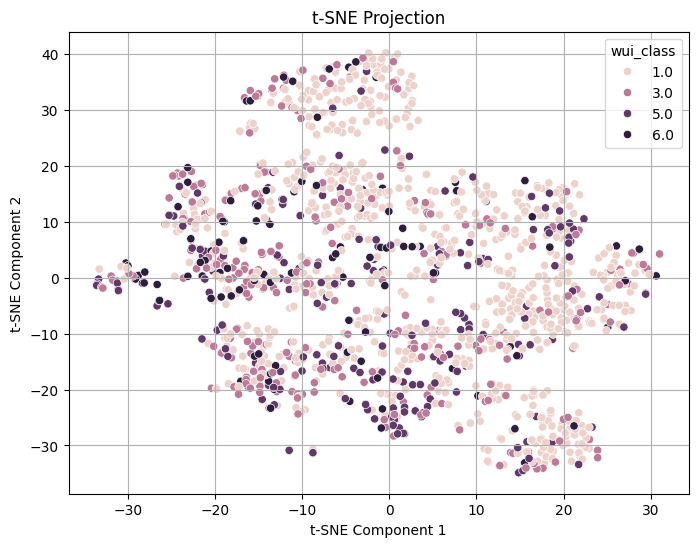

In [140]:
# Apply t-SNE
tsne = TSNE(n_components=2, 
            perplexity = 45, 
            max_iter = 800,
            random_state=42
           )
X_tsne = tsne.fit_transform(X_scaled)

# Convert to DataFrame
df_tsne = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])

# Plot the data in 2D with associated labels
plt.figure(figsize=(8,6))
sns.scatterplot(x=df_tsne['TSNE1'], y=df_tsne['TSNE2'], hue=df['wui_class'])
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE Projection")
plt.grid()
plt.show()

We're starting to see some structure being revealed with t-SNE. However, these clusters to not map to risk rating very well, as we can see when we color the points by their risk rating (or re-scaled risk rating, or wui_class, or any other categorical variable). Let's try varying the 'perplexity' parameter. From the scikit-learn [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html), perplexity is related to the number of nearest neighbors that are used. Larger datasets usually require a larger perplexity. Below, we vary perplexity between 5 and 50 (recommended in the package documentation) and compare the results visually.

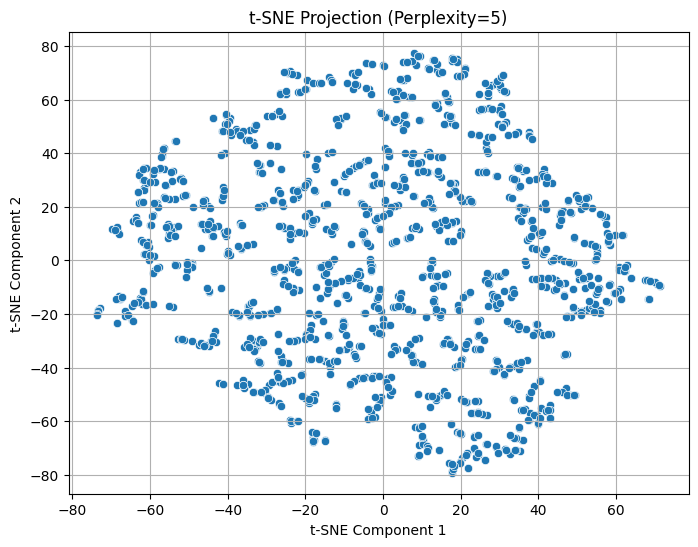

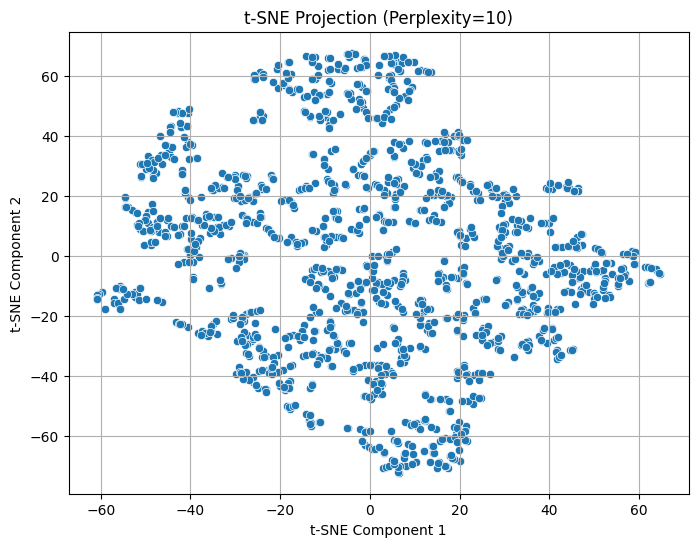

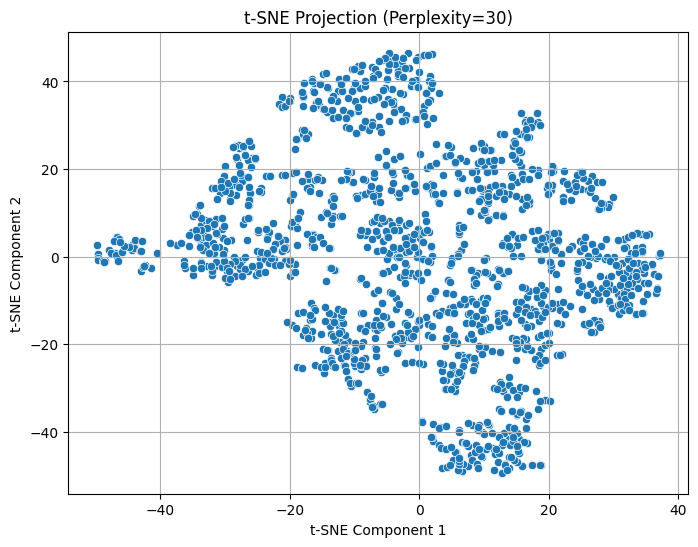

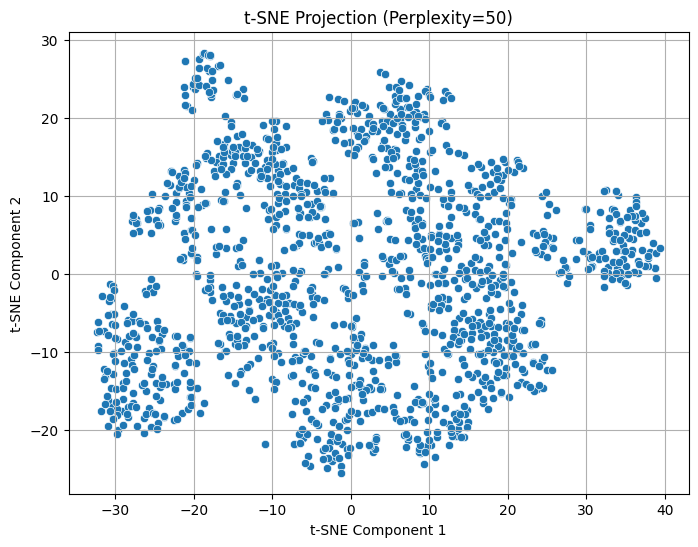

In [98]:
for perplexity in [5, 10, 30, 50]:
    tsne = TSNE(n_components=2, perplexity=perplexity, max_iter=750, random_state=42)
    X_tsne = tsne.fit_transform(X_scaled)
    
    plt.figure(figsize=(8,6))
    sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1])
    plt.title(f"t-SNE Projection (Perplexity={perplexity})")
    plt.xlabel("t-SNE Component 1")
    plt.ylabel("t-SNE Component 2")
    plt.grid()
    plt.show()

We can see from the plots above that - at least visually - we get some gains between perplexity values of 10 and 30. However, it appears that we get diminishing returns between 30 and 50. Let's plot 25, 35, and 45.

I vary the color by different categorical variables, so the point colors represent a different variable depending on which one I looked at last. The two most interesting to look at are Risk_Rating and wui_class.

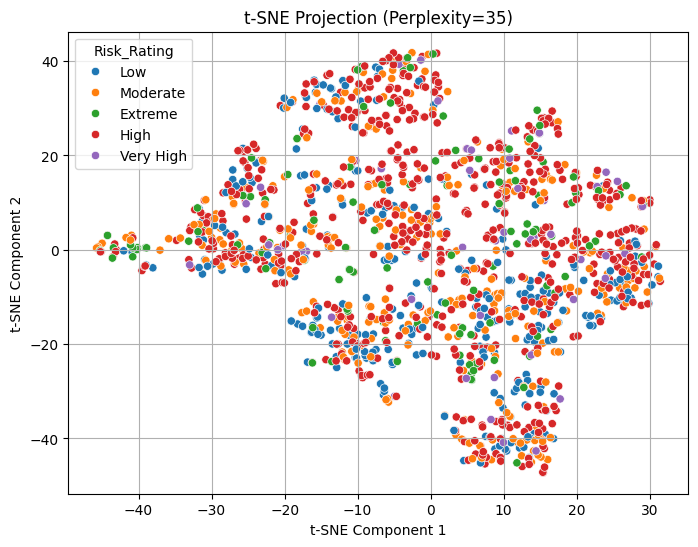

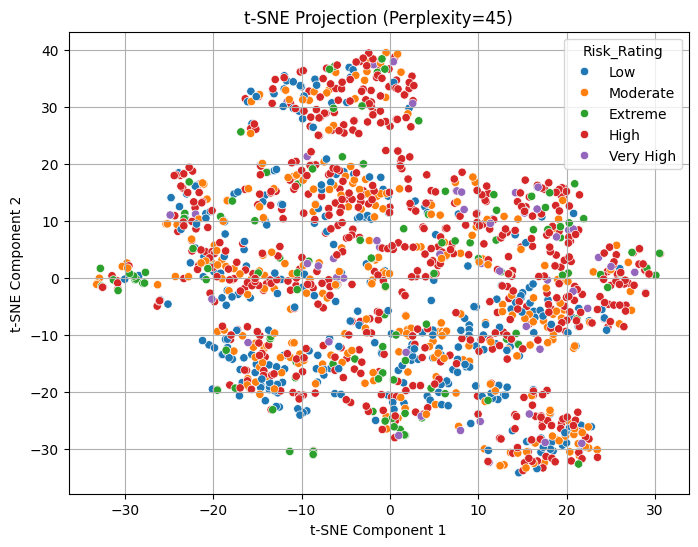

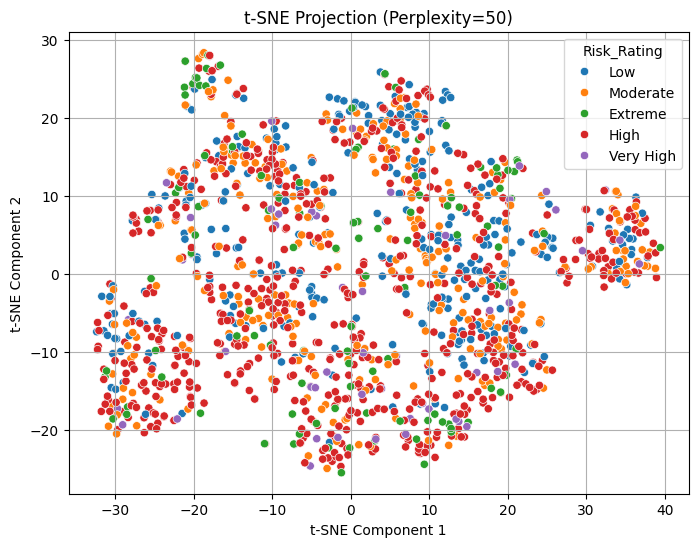

In [152]:
for perplexity in [35, 45, 50]:
    tsne = TSNE(n_components=2, perplexity=perplexity, max_iter=750, random_state=42)
    X_tsne = tsne.fit_transform(X_scaled)
    
    plt.figure(figsize=(8,6))
    sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=df['Risk_Rating'])
    plt.title(f"t-SNE Projection (Perplexity={perplexity})")
    plt.xlabel("t-SNE Component 1")
    plt.ylabel("t-SNE Component 2")
    plt.grid()
    plt.show()

There is a noticeable visual difference between perplexity values of 35, 45 and 50. It will be interesting to look at these three outcomes individually in greater detail. How effective will different methods of clustering be on the dataset with dimensionality reduced via t-SNE? We will look at that later, but first, we're going to try t-SNE with isolated hiz and structure features to see what the clusters look like.

In the plots above, I varied point color by different known categorical variables. There is not much structure in the data, but wui_class shows interesting separation, and it's notable that roof cover (tax_RCVR) has an outlying group of WOOD roofs. Not perfectly segmented, but definitely is showing up as the dominant force of that outlying cluster. That same cluster has fewer structures with HIZ extending out of the property boundary (hiz_ext_out) which suggests that homes on larger properties are more likely to have wood roofs. Risk Rating does not cluster well.

In [123]:
# hiz cols include SSD, property size and fuel cover
hiz_cols = [
    'min_ssd',
    'mean_cc0_2m',
    'mean_cc2_4m',
    'mean_cc4_8m',
    'mean_cc8_40m',
    'sum_cc',
    'ACRES_calc'
]

# structure cols include structure features and structure density
str_cols = [
    'intersections',
    'tax_SQFT',
    'tax_EYB',
    'tax_EXW_PERCENT',
    'tax_RMS'
]

from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Standardize HIZ Features
scaler_hiz = StandardScaler()
X_hiz = scaler_hiz.fit_transform(df[hiz_cols])

# Standardize Structure Features
scaler_str = StandardScaler()
X_str = scaler_str.fit_transform(df[str_cols])

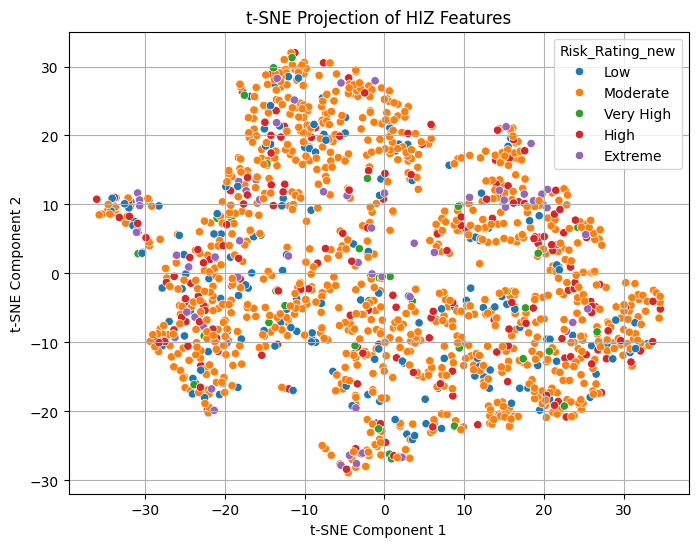

In [150]:
tsne_hiz = TSNE(n_components=2, perplexity=45, max_iter=800, random_state=42)
X_hiz_tsne = tsne_hiz.fit_transform(X_hiz)

# Convert to DataFrame
df_hiz_tsne = pd.DataFrame(X_hiz_tsne, columns=['TSNE1', 'TSNE2'])

# Plot t-SNE Results for HIZ
plt.figure(figsize=(8,6))
sns.scatterplot(x=df_hiz_tsne['TSNE1'], y=df_hiz_tsne['TSNE2'], hue=df['Risk_Rating_new'])
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE Projection of HIZ Features")
plt.grid()
plt.show()

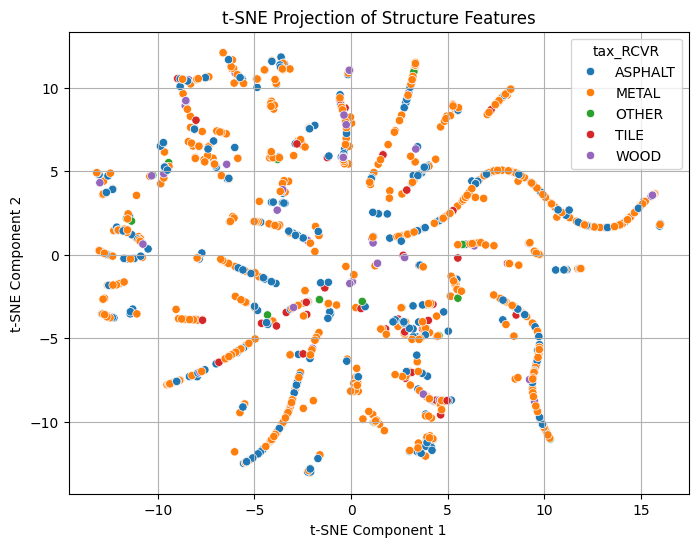

In [151]:
tsne_str = TSNE(n_components=2, perplexity=25, max_iter=300, random_state=42)
X_str_tsne = tsne_str.fit_transform(X_str)

# Convert to DataFrame
df_str_tsne = pd.DataFrame(X_str_tsne, columns=['TSNE1', 'TSNE2'])

# Plot t-SNE Results for Structure Features
plt.figure(figsize=(8,6))
sns.scatterplot(x=df_str_tsne['TSNE1'], y=df_str_tsne['TSNE2'], hue=df['tax_RCVR'])
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE Projection of Structure Features")
plt.grid()
plt.show()


According to research, t-SNE is notoriously difficult to interpret due to its nonlinear, probabilistic embedding that distorts global structures to preserve local relationships. Something interesting that we can see with the structure features is the octopus-like grouping of features, which remains similar when I tune the hyperparameters (primarily perplexity and max_iter). This suggests that the data may not be truly clustered, but rather follow a continuous distribution, where values smoothly increase or decrease, rather than forming separate groups. This suggests that clustering may be better performed on categorical data, if I could transform the categorical data into numeric values. The octopus-like result also may mean that some values dominate. It could also mean that t-SNE is revealing feature interactions that make sense in higher dimensions but look weird in 2D. 

The poor clustering of HIZ values suggests that noise dominates the dataset. 

## Reducing Dimensionality - Cateogorical Data Encoding
---

In [ ]:
# What are the columns, how many unique values, and what are the values?
for col in cat_cols:
    print(f'Column: {col}, {df[col].nunique()} values')
    print(df[col].unique())

Column: wui_class, 4 values
[1 3 5 6]
Column: hiz_ext_out, 2 values
[False  True]
Column: tax_ARCH, 8 values
['SINGLE STORY' 'MULTI STORY' 'COMMERCIAL' 'CUSTOM' 'MANUFACTURED'
 'ALTERNATIVE' 'LOG' 'MULTI FAMILY']
Column: tax_EXW, 4 values
['CONC/MSNRY' 'METAL' 'WOOD' 'MANFCTD']
Column: tax_HTFL, 4 values
['GAS' 'STOVE' 'ELECTRIC' 'PROPANE']
Column: tax_RCVR, 5 values
['ASPHALT' 'METAL' 'OTHER' 'TILE' 'WOOD']
Column: tax_RSTR, 5 values
['GABLE' 'MANSARD' 'SHED' 'MULTI_PEAK' 'OTHER']
Column: Type, 3 values
['Residence' 'Commercial' 'Mobile Home']
Column: tax_DGR, 3 values
['None' 'Large' 'Small']
Column: tax_PTO, 3 values
['Large' 'None' 'Small']
Column: tax_WBL, 3 values
['None' 'Small' 'Large']
Column: tax_OPP, 3 values
['Large' 'Small' 'None']


I've printed my categorical variables and their unique values above. Here is how we are going to treat each variable:

- `wui_class`: convert from int to str value and one-hot encode (OHE). This dtype transformation is because these values are nominal, not ordinal.
- `hiz_ext_out`: leave as-is, because it's already binary encoded
- `tax_ARCH`: one-hot encode (OHE). 8 categories are manageable but may dominate t-SNE. We'll see.
- `tax_EXW`: change metal to manfctd so there are only 3 categories, then OHE
- `tax_HTFL`: drop, because there is little evidence in the literature that this is predictive of structure loss. To keep the dataset from blowing up with OHE, I'm dropping it.
- `tax_RCVR`: OHE
- `tax_RSTR`: OHE
- `Type`: drop, because nearly all observations are 'Residential', so there is little information to be gained
- `tax_DGR`: convert to numeric (ordinal encoding)
- `tax_PTO`: convert to numeric (ordinal encoding)
- `tax_WBL`: convert to numeric (ordinal encoding)
- `tax_OPP`: convert to numeric (ordinal encoding)

In [164]:
from sklearn.preprocessing import OneHotEncoder
# Initialize OHE
ohe = OneHotEncoder(sparse_output=False, drop='first')

# Convert wui_class from int to string
df['wui_class'] = df['wui_class'].astype(str)

# Reduce categories in tax_EXW
df['tax_EXW'] = df['tax_EXW'].replace({'METAL': 'MANFCTD'})

# Drop tax_HTFL and Type from cat_cols list
for col in ['Type', 'tax_HTFL']:
    cat_cols.remove(col)

# Convert last 4 columns to numeric for ordinal encoding
size_map = {'None': 1, 'Small': 2, 'Large': 3}
df['tax_DGR'] = df['tax_DGR'].map(size_map)
df['tax_PTO'] = df['tax_PTO'].map(size_map)
df['tax_WBL'] = df['tax_WBL'].map(size_map)
df['tax_OPP'] = df['tax_OPP'].map(size_map)

# OHE cols
ohe_cols = ['wui_class', 'tax_ARCH', 'tax_EXW', 'tax_RCVR', 'tax_RSTR']
ohe_array = ohe.fit_transform(df[ohe_cols])
ohe_df = pd.DataFrame(ohe_array, columns=ohe.get_feature_names_out(ohe_cols))
df = pd.concat([df, ohe_df], axis=1)

df.head()


,rwra_index,feat_index,parcel_num,Year,address,ParcelNum,Model,Address_Visible,Driveway_Clearance,Driveway_Lenth,Dist_to_Danger_Topo,Slope_Final,Background_Fuels,Defensible_Space,Roofing_Material,Building_Exterior,Other_Combustibles,Decks_and_Fencing,Proximity_to_Neighboring_Home,Ingress_Egress,Score_Final,Risk_Rating,County,wui_class,min_ssd,mean_cc0_2m,mean_cc2_4m,mean_cc4_8m,mean_cc8_40m,intersections,PARCELNB,ACCOUNT,ACRES_calc,hiz_ext_out,tax_AIRC,tax_ARCH,tax_SQFT,tax_COND,tax_EYB,tax_EXW_PERCENT,tax_EXW,tax_FLR,tax_FRME,tax_HTFL,tax_INT,tax_RMS,tax_RCVR,tax_RSTR,Type,sum_cc,tax_WBL,tax_DGR,tax_PTO,tax_OPP,Risk_Rating_new,At_Least_8_Unobserved,wui_class_3,wui_class_5,wui_class_6,tax_ARCH_COMMERCIAL,tax_ARCH_CUSTOM,tax_ARCH_LOG,tax_ARCH_MANUFACTURED,tax_ARCH_MULTI FAMILY,tax_ARCH_MULTI STORY,tax_ARCH_SINGLE STORY,tax_EXW_MANFCTD,tax_EXW_WOOD,tax_RCVR_METAL,tax_RCVR_OTHER,tax_RCVR_TILE,tax_RCVR_WOOD,tax_RSTR_MANSARD,tax_RSTR_MULTI_PEAK,tax_RSTR_OTHER,tax_RSTR_SHED
4,5.0,921.0,4.039351e+11,2017.0,416 COUNTY ROAD 22A,4.039351e+11,B,5.0,0.0,11.0,0.0,0.0,10.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,76.0,Low,Ouray County,1,211.505051,0.048738,0.084885,0.034318,0.00000,0.0,4.039351e+11,R000531,32.728300,False,1 - NONE,SINGLE STORY,4034.9,3 - GOOD,2015.0,100.0,CONC/MSNRY,WDJST,WOOD,GAS,DRYWALL,0.776148,ASPHALT,GABLE,Residence,0.167940,1.0,1.0,3.0,3.0,Low,False,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,6.0,509.0,4.039264e+11,2017.0,3100 COUNTY ROAD 22,4.039264e+11,B,15.0,0.0,11.0,0.0,0.0,10.0,0.0,0.0,0.0,80.0,0.0,0.0,0.0,116.0,Low,Ouray County,3,180.054332,0.023967,0.015273,0.000271,0.00004,0.0,4.039264e+11,R005599,9.707660,False,1 - NONE,MULTI STORY,1942.0,2 - VERY GOOD,2010.0,100.0,CONC/MSNRY,WDJST,WOOD,GAS,DRYWALL,0.776148,METAL,GABLE,Residence,0.039551,2.0,1.0,1.0,2.0,Low,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,7.0,1296.0,4.039263e+11,2017.0,3245 COUNTY ROAD 22,4.039263e+11,B,0.0,0.0,11.0,0.0,0.0,20.0,50.0,0.0,0.0,0.0,0.0,100.0,0.0,181.0,Low,Ouray County,1,5.979973,0.032157,0.101354,0.136954,0.00000,1.0,4.039263e+11,R004277,0.822618,True,1 - NONE,COMMERCIAL,1579.0,4 - AVERAGE,2000.0,100.0,MANFCTD,CONC/MSNRY,WOOD,STOVE,DRYWALL,0.000000,METAL,MANSARD,Commercial,0.270465,1.0,1.0,1.0,1.0,Low,False,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,8.0,727.0,4.039363e+11,2017.0,4452 COUNTY ROAD 1,4.039363e+11,B,5.0,5.0,11.0,0.0,0.0,10.0,0.0,0.0,70.0,0.0,100.0,50.0,0.0,251.0,Moderate,Ouray County,3,20.479874,0.025695,0.047097,0.039426,0.00012,1.0,4.039363e+11,R004198,38.439600,False,1 - NONE,MULTI STORY,2865.0,3 - GOOD,2000.0,100.0,WOOD,WDJST,WOOD,STOVE,DRYWALL,0.000000,METAL,GABLE,Residence,0.112337,1.0,1.0,1.0,1.0,Moderate,False,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,9.0,1332.0,4.039352e+11,2017.0,3479 COUNTY ROAD 22,4.039352e+11,B,5.0,5.0,11.0,0.0,0.0,10.0,0.0,0.0,70.0,80.0,0.0,0.0,0.0,181.0,Low,Ouray County,5,100.486083,0.018661,0.045186,0.068360,0.00000,0.0,4.039352e+11,R004237,12.296800,True,1 - NONE,MULTI STORY,1696.0,3 - GOOD,2000.0,100.0,WOOD,WDJST,WOOD,ELECTRIC,DRYWALL,0.000000,ASPHALT,GABLE,Residence,0.132208,1.0,1.0,1.0,2.0,Low,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Now let's select the numeric columns and alter our num_cols list accordingly.

In [165]:
num_cols

['min_ssd',
 'mean_cc0_2m',
 'mean_cc2_4m',
 'mean_cc4_8m',
 'mean_cc8_40m',
 'sum_cc',
 'intersections',
 'ACRES_calc',
 'tax_SQFT',
 'tax_EYB',
 'tax_EXW_PERCENT',
 'tax_RMS']

In [167]:
temp_ls = [
    'hiz_ext_out',
    'tax_WBL',
    'tax_DGR',
    'tax_PTO',
    'tax_OPP',
    'wui_class_3',
    'wui_class_5',
    'wui_class_6',
    'tax_ARCH_COMMERCIAL',
    'tax_ARCH_CUSTOM',
    'tax_ARCH_LOG',
    'tax_ARCH_MANUFACTURED',
    'tax_ARCH_MULTI FAMILY',
    'tax_ARCH_MULTI STORY',
    'tax_ARCH_SINGLE STORY',
    'tax_EXW_MANFCTD',
    'tax_EXW_WOOD',
    'tax_RCVR_METAL', 
    'tax_RCVR_OTHER', 
    'tax_RCVR_TILE', 
    'tax_RCVR_WOOD',
    'tax_RSTR_MANSARD', 
    'tax_RSTR_MULTI_PEAK', 
    'tax_RSTR_OTHER',
    'tax_RSTR_SHED'
]

num_cols.extend(temp_ls)

num_cols

['min_ssd',
 'mean_cc0_2m',
 'mean_cc2_4m',
 'mean_cc4_8m',
 'mean_cc8_40m',
 'sum_cc',
 'intersections',
 'ACRES_calc',
 'tax_SQFT',
 'tax_EYB',
 'tax_EXW_PERCENT',
 'tax_RMS',
 'hiz_ext_out',
 'tax_WBL',
 'tax_DGR',
 'tax_PTO',
 'tax_OPP',
 'wui_class_3',
 'wui_class_5',
 'wui_class_6',
 'tax_ARCH_COMMERCIAL',
 'tax_ARCH_CUSTOM',
 'tax_ARCH_LOG',
 'tax_ARCH_MANUFACTURED',
 'tax_ARCH_MULTI FAMILY',
 'tax_ARCH_MULTI STORY',
 'tax_ARCH_SINGLE STORY',
 'tax_EXW_MANFCTD',
 'tax_EXW_WOOD',
 'tax_RCVR_METAL',
 'tax_RCVR_OTHER',
 'tax_RCVR_TILE',
 'tax_RCVR_WOOD',
 'tax_RSTR_MANSARD',
 'tax_RSTR_MULTI_PEAK',
 'tax_RSTR_OTHER',
 'tax_RSTR_SHED']

In [169]:
print(f'there are {len(num_cols)} predictive features')

there are 37 predictive features


37 predictive features is not crazy-high dimensionality, but based on the t-SNE I performed above, I expect that there could be a lot of noise in this dataset. Furthermore, architecture type is rather dominant in these features, making up about 1/5 of all features after one-hot encoding. We will see how the t-SNE performs as-is. Then, we can experiment with adjusting achitecture to possible only include less features. 

Additionally, there are noisy features such as the LiDAR raster measurements that we could possibly remove. Let's dive in and take it from there. 

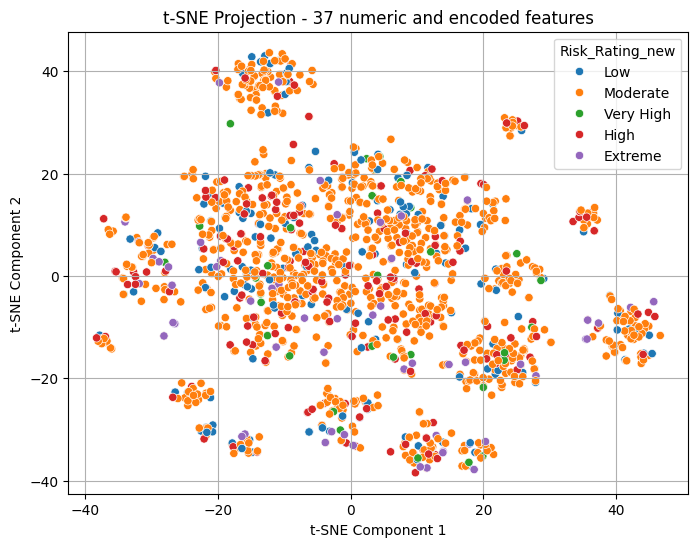

In [202]:
# Scale features
from sklearn.preprocessing import StandardScaler

# Select num_cols
X_final = df[num_cols]
X_final = X_final.dropna() # Optionally drop NaN rows (there are 8 rows with NaN values in this dataset)

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_final)

##################################
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Run t-SNE
tsne = TSNE(n_components=2, perplexity=45, max_iter=999, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Convert to DataFrame
df_tsne = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])

# Visualize t-SNE
plt.figure(figsize=(8,6))
sns.scatterplot(x=df_tsne['TSNE1'], y=df_tsne['TSNE2'], hue=df['Risk_Rating_new'])
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE Projection - 37 numeric and encoded features")
plt.grid()
plt.show()


There are now emerging clusters from t-SNE, and I have set the hyperparameters for the clearest clustering. This is probably sufficient clustering to be able to separate with DBSCAN or K-Means. However, I am going to try reducing the noise in the data to see if we get better clustering with fewer features. When I color points by numeric or categorical data, there is no clear cluster separation (e.g. by risk rating, year built, architecture style, square footage, property acreage, roof cover, etc.). Therefore, this will take some more detailed exploration to determine what the clusters are and how homes are characterized.

**CHECKPOINT 2025-03-05**: My next steps are to reduce and further transform the data. Based on the improved t-SNE with the inclusion of categorical variables, it is reasonable to believe that classifying some of my numeric data (such as the LiDAR rasters) into classes of fuel volume (e.g. x < mean_cc0_2m < y etc.) will reduce noise and improve clustering. Additionally, removing or consolidating some of the architecture categories may lead to improved clustering.

# BREAK
---


---

In [1]:
################################
# Load the data
################################
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons

# Create / load the datasets:
n_samples = 1500
X0, _ = make_blobs(n_samples=n_samples, centers=2, n_features=2, random_state=0)
X1, _ = make_blobs(n_samples=n_samples, centers=5, n_features=2, random_state=0)

random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state, cluster_std=1.3)
transformation = [[0.6, -0.6], [-0.2, 0.8]]
X2 = np.dot(X, transformation)
X3, _ = make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state)
X4, _ = make_moons(n_samples=n_samples, noise=.12)

X = [X0, X1, X2, X3, X4]
# The datasets are X[i], where i ranges from 0 to 4

In [2]:
################################
# Code to plot clusters
################################
def plot_cluster(ax, data, cluster_assignments):
    '''Plot two-dimensional data clusters
    
    Parameters
    ----------
    ax : matplotlib axis
        Axis to plot on
    data : list or numpy array of size [N x 2] 
        Clustered data
    cluster_assignments : list or numpy array [N]
        Cluster assignments for each point in data

    '''
    clusters = np.unique(cluster_assignments)
    n_clusters = len(clusters)
    for ca in clusters:
        kwargs = {}
        if ca == -1:
            # if samples are not assigned to a cluster (have a cluster assignment of -1, color them gray)
            kwargs = {'color':'gray'}
            n_clusters = n_clusters - 1
        ax.scatter(data[cluster_assignments==ca, 0], data[cluster_assignments==ca, 1],s=5,alpha=0.5, **kwargs)
        ax.set_xlabel('feature 1')
        ax.set_ylabel('feature 2')
        ax.set_title(f'No. Clusters = {n_clusters}')
        ax.axis('equal')

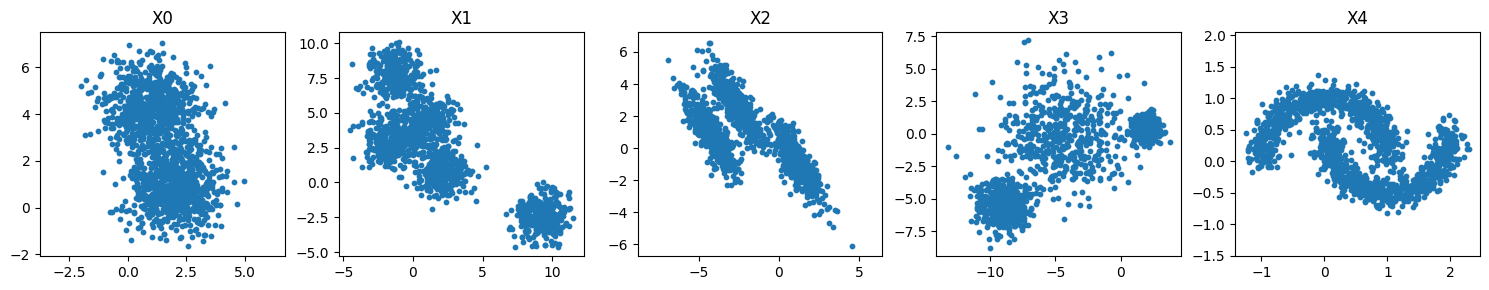

In [3]:
# Set up subplots
fig, axes = plt.subplots(1, 5, figsize=(15, 3))

# Plot each dataset in a separate subplot
for i, (dataset, title) in enumerate(zip(X, ["X0", "X1", "X2", "X3", "X4"])):
    axes[i].scatter(dataset[:, 0], dataset[:, 1], s=10)
    axes[i].set_title(title)
    axes[i].axis('equal')  # Set equal scaling for better visualization

# Adjust layout
plt.tight_layout()
plt.show()

Now that we have viewed the basic shape of the data, we can create elbow curves for each dataset to determine what $k$ value to set for k-means clustering. (Refer to machine learning assignment 5)

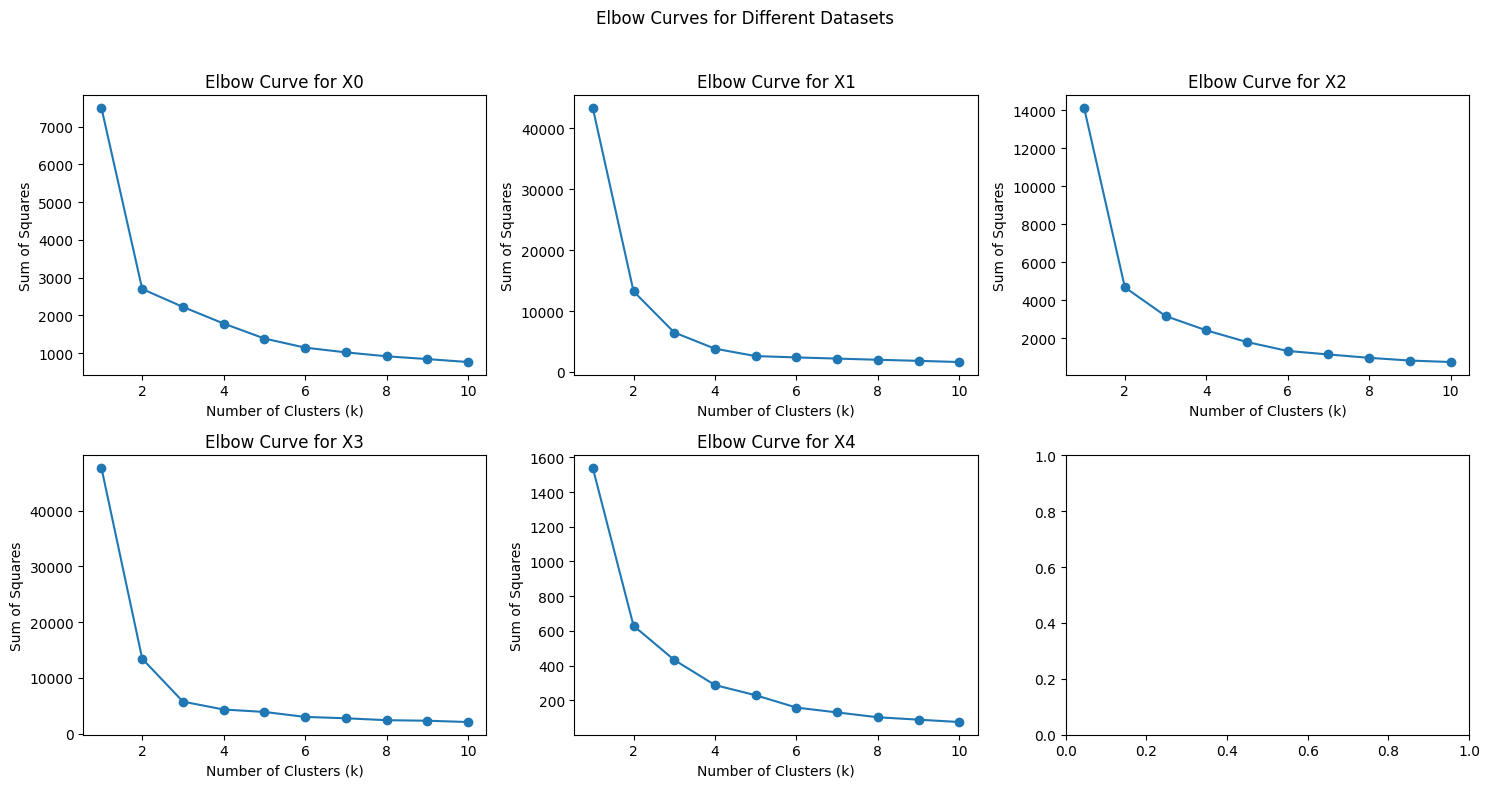

In [5]:
from sklearn.cluster import KMeans
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Create a 3x3 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
fig.suptitle('Elbow Curves for Different Datasets')

# Create an inertia list for each dataset
for i, dataset in enumerate(X):
    sumsqs = []
    
    # Iterate through cluster sizes and calculate inertia, appending to inertia list   
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(dataset)
        sumsqs.append(kmeans.inertia_)
        
    # Plot the elbow curve on the corresponding subplot
    row = i // 3
    col = i % 3
    axes[row, col].plot(range(1, 11), sumsqs, marker='o')
    axes[row, col].set_title(f'Elbow Curve for X{i}')
    axes[row, col].set_xlabel('Number of Clusters (k)')
    axes[row, col].set_ylabel('Sum of Squares')

# Adjust layout and show the plot
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Now we can plot the cluster assignments.

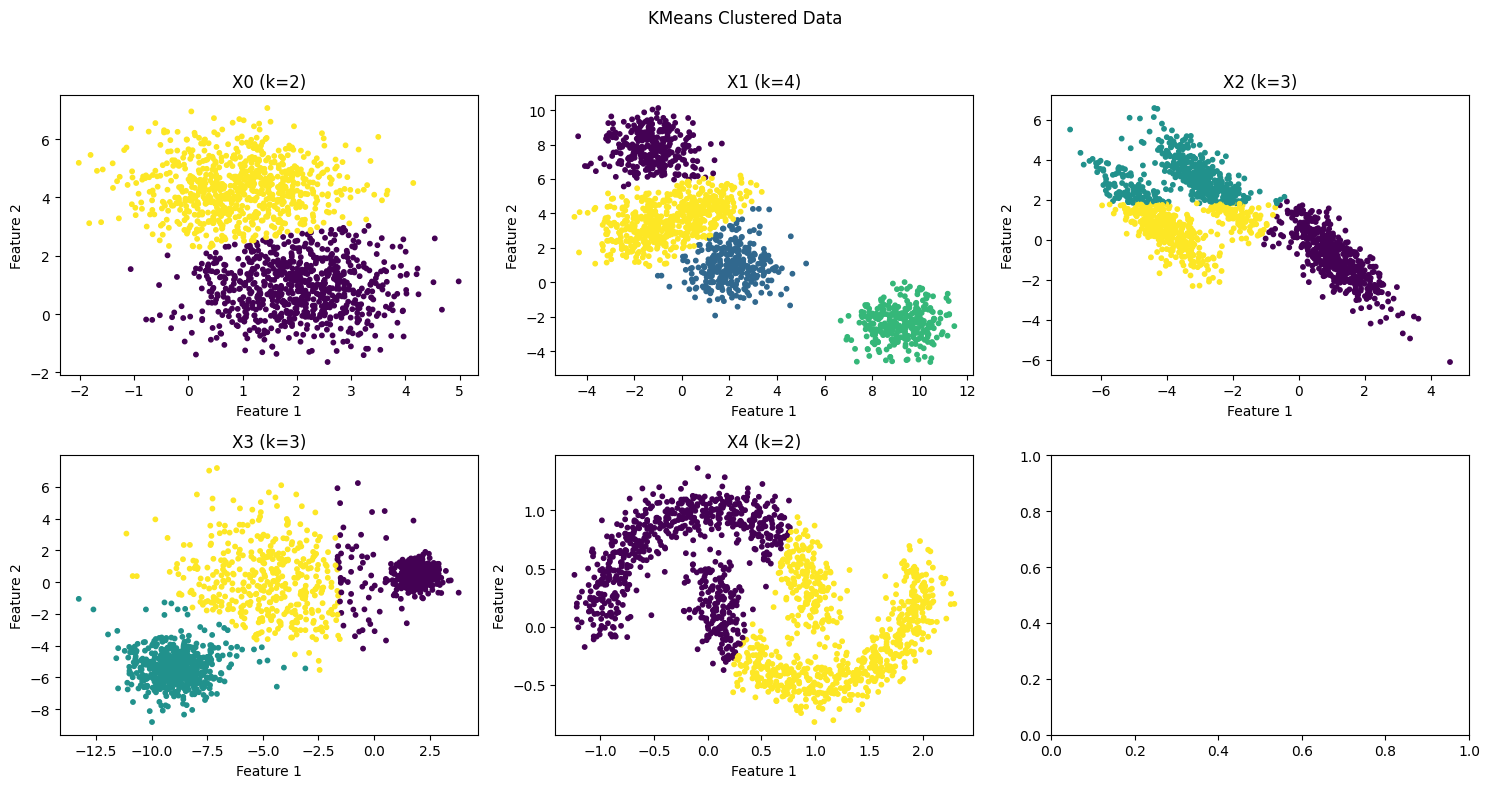

In [6]:
#### K MEANS CLUSTERING ####

# List of best k values for each dataset
best_kmeans = [2, 4, 3, 3, 2]

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
fig.suptitle('KMeans Clustered Data')

# Iterate over datasets and corresponding best k values
for i, (dataset, best_k) in enumerate(zip(X, best_kmeans)):
    # Fit the specified k-means model
    kmeans = KMeans(n_clusters=best_k, random_state=0)
    cluster_assignments = kmeans.fit_predict(dataset)
    
    # Plot the clustered data on the corresponding subplot
    row = i // 3
    col = i % 3
    axes[row, col].scatter(dataset[:, 0], dataset[:, 1], c=cluster_assignments, cmap='viridis', s=10)
    axes[row, col].set_title(f'X{i} (k={best_k})')
    axes[row, col].set_xlabel('Feature 1')
    axes[row, col].set_ylabel('Feature 2')

# Adjust layout and show the plot
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

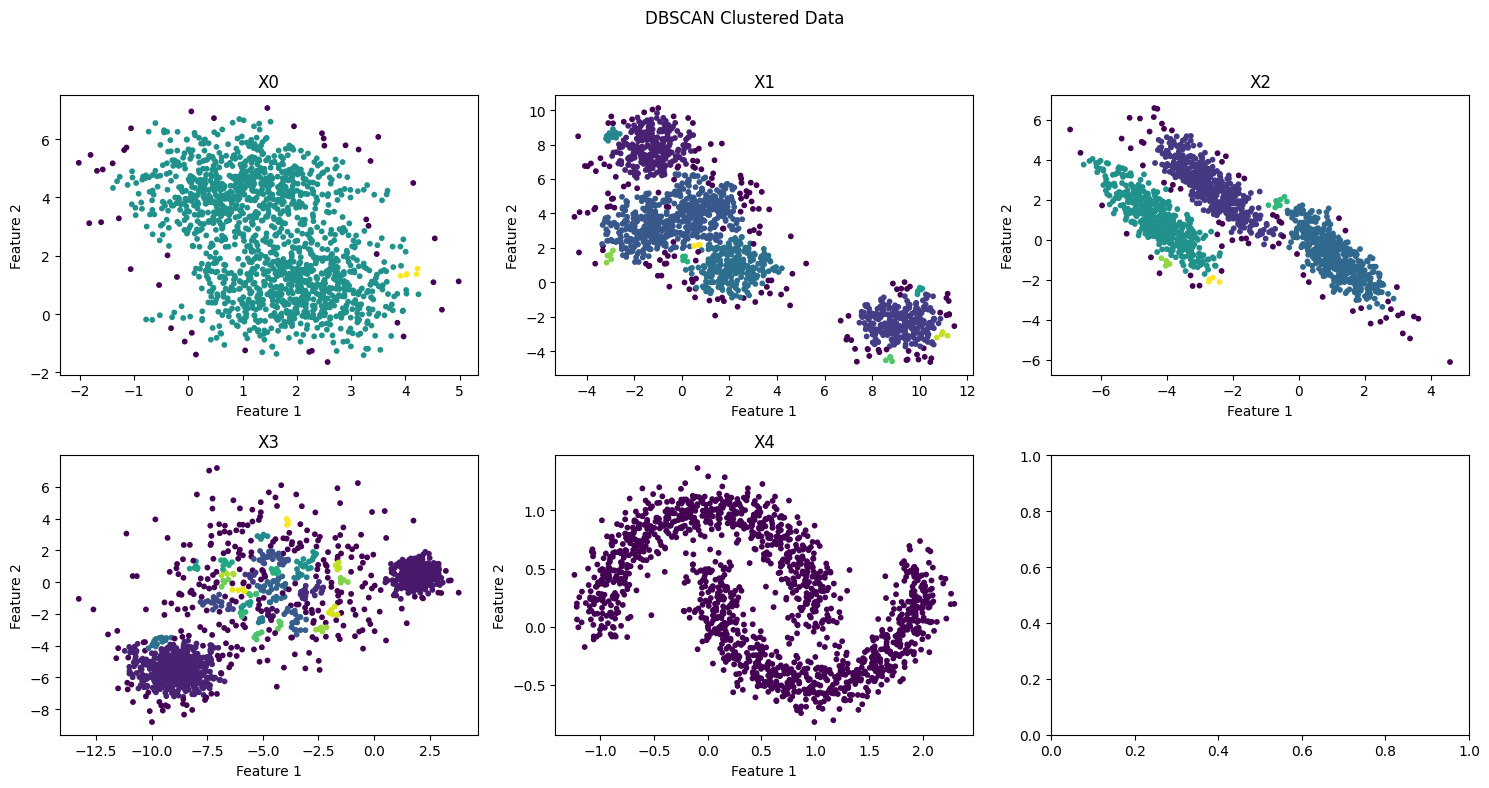

In [7]:
#### DBSCAN CLUSTERING ####

from sklearn.cluster import DBSCAN

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
fig.suptitle('DBSCAN Clustered Data')

# Iterate over datasets
for i, dataset in enumerate(X):
    # Apply DBSCAN clustering
    dbscan = DBSCAN(eps=0.3, min_samples=4)
    cluster_assignments = dbscan.fit_predict(dataset)
    
    # Plot the clustered data on the corresponding subplot
    row = i // 3
    col = i % 3
    axes[row, col].scatter(dataset[:, 0], dataset[:, 1], c=cluster_assignments, cmap='viridis', s=10)
    axes[row, col].set_title(f'X{i}')
    axes[row, col].set_xlabel('Feature 1')
    axes[row, col].set_ylabel('Feature 2')

# Adjust layout and show the plot
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

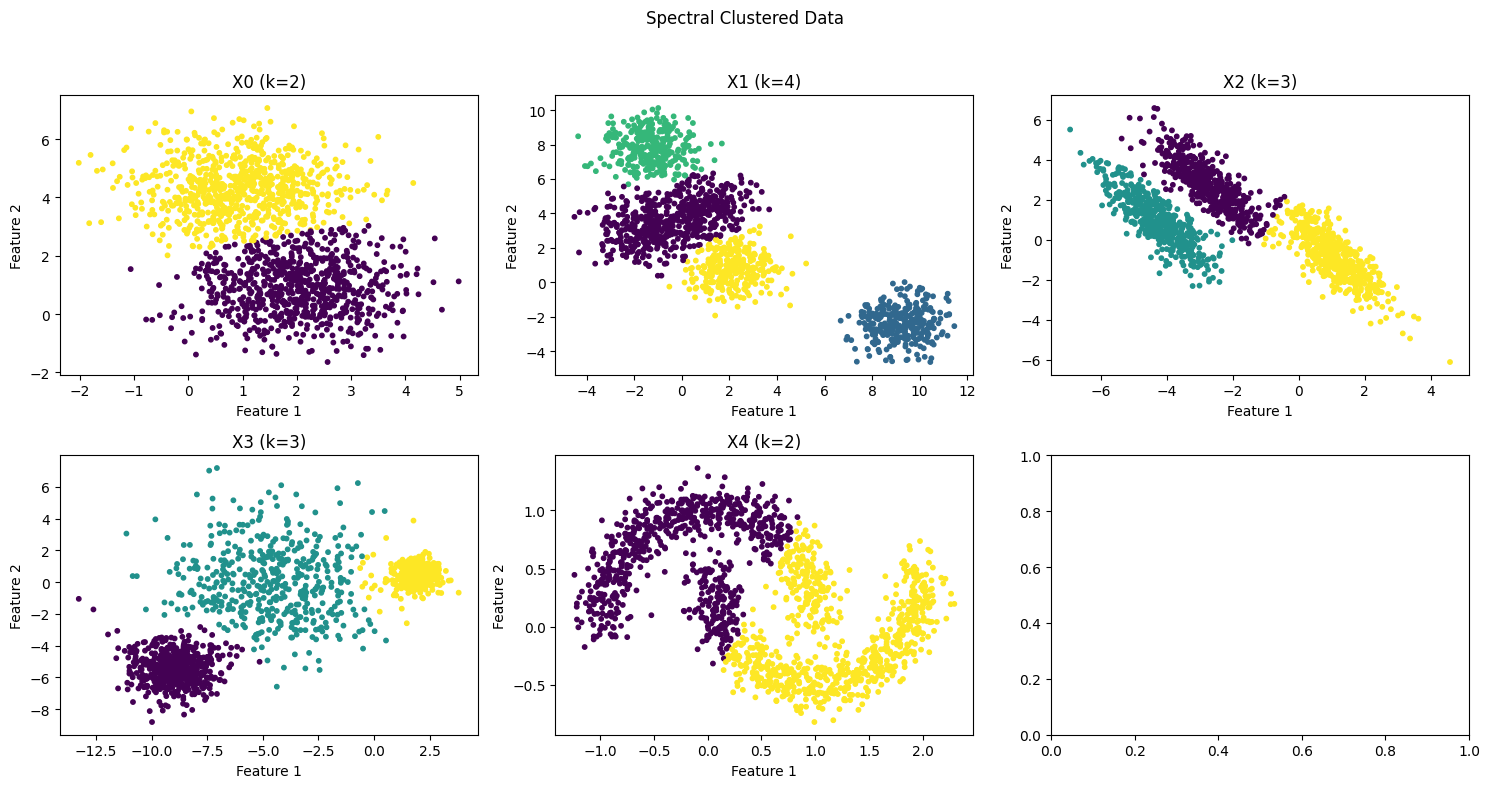

In [8]:
#### SPECTRAL CLUSTERING ####

from sklearn.cluster import SpectralClustering as spc

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
fig.suptitle('Spectral Clustered Data')

# Iterate over datasets and corresponding best k values
for i, (dataset, n) in enumerate(zip(X, best_kmeans)):
    # Fit the specified spectral clustering model
    spectral = spc(n_clusters=n)
    cluster_assignments = spectral.fit_predict(dataset)
    
    # Plot the clustered data on the corresponding subplot
    row = i // 3
    col = i % 3
    axes[row, col].scatter(dataset[:, 0], dataset[:, 1], c=cluster_assignments, cmap='viridis', s=10)
    axes[row, col].set_title(f'X{i} (k={n})')
    axes[row, col].set_xlabel('Feature 1')
    axes[row, col].set_ylabel('Feature 2')

# Adjust layout and show the plot
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [ ]:
# Apply PCA
n_components = 2  # Number of components for PCA
pca = PCA(n_components = n_components)
X_pca = pca.fit_transform(X_digits)

# Plot the data in 2D space with labels
plt.figure(figsize=(7.5, 6))

for i in range(10):
    indices = (y_digits == i)
    plt.scatter(X_pca[indices, 0], X_pca[indices, 1], label=str(i), s=20)

plt.title('PCA of Digits Dataset (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Digit', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()